In [1]:
import argparse
import os
import sys
SCRIPT_DIR = os.path.dirname(os.path.abspath("/project/pi_ekalogerakis_umass_edu/dshivashok/ControlNet/evaluations/ulip_testing/"))
print(SCRIPT_DIR)
sys.path.append(os.path.dirname(SCRIPT_DIR))
import random
import cv2
import einops
import numpy as np
import torch
from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.midas import MidasDetector

from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked_periodic_no_ctrl import DDIMSampler
import gc

/project/pi_ekalogerakis_umass_edu/dshivashok/ControlNet/evaluations


/home/dshivashok_umass_edu/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dshivashok_umass_edu/.local/lib/python3.8/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [6]:
def extract_depth_zoe(input_image, detect_resolution, image_resolution):
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    repo = "isl-org/ZoeDepth"
    model_zoe_n = torch.hub.load(repo, "ZoeD_N", pretrained=True)
    apply_zoe = model_zoe_n.to(DEVICE)
    input_image = HWC3(input_image)
    detected_map = apply_zoe.infer_pil(resize_image(input_image, detect_resolution))
    detected_map = HWC3(detected_map)
    img = resize_image(input_image, image_resolution)
    H, W, C = img.shape
    detected_map = cv2.resize(detected_map, (W, H), interpolation=cv2.INTER_LINEAR)
    detected_map = cv2.normalize(detected_map, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    detected_map = detected_map.astype(np.uint8)
    print(np.max(detected_map), np.min(detected_map))
    print(detected_map.shape)
    print(detected_map)
    return detected_map


In [7]:
import matplotlib.pyplot as plt

#plot the image
detected_map = extract_depth_zoe(cv2.imread("/project/pi_ekalogerakis_umass_edu/dshivashok/ControlNet/evaluations/ulip_testing/data/test1/03001627_pointbert_100_controlnet/03001627_1bec15f362b641ca7350b1b2f753f3a2/0/36/0/03001627_1bec15f362b641ca7350b1b2f753f3a2_view_36_seed_0_interval_0_baseline.jpg"), 512, 512)

Using cache found in /home/dshivashok_umass_edu/.cache/torch/hub/isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in /home/dshivashok_umass_edu/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt
Loaded successfully
uint8 (512, 512, 3)
float32 (512, 512)
255 0
(512, 512, 3)
[[[210 210 210]
  [211 211 211]
  [211 211 211]
  ...
  [104 104 104]
  [104 104 104]
  [103 103 103]]

 [[211 211 211]
  [211 211 211]
  [212 212 212]
  ...
  [105 105 105]
  [104 104 104]
  [104 104 104]]

 [[211 211 211]
  [212 212 212]
  [212 212 212]
  ...
  [105 105 105]
  [104 104 104]
  [104 104 104]]

 ...

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [  3   3   3]
  [  3   3   3]
  [  2   2   2]]

 [[  5   5   5]
  [  5   5   5]
  [  6   6   6]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  4   4   4]
  [  4   4   4]
  [  4   4   4]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


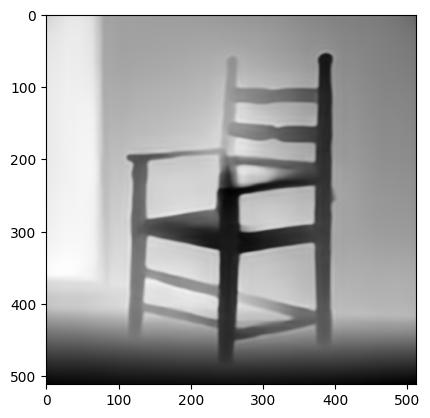

In [8]:
plt.imshow(detected_map)